In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
ret_df = pd.read_csv('retirement_prediction.csv')
ret_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
ret_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
ret_df.describe(include='object')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [12]:
ret_df['salary'].value_counts(normalize=True, sort=False), ret_df['department'].value_counts(normalize=True, sort=False)

(low       0.487766
 medium    0.429762
 high      0.082472
 Name: salary, dtype: float64,
 sales          0.276018
 accounting     0.051137
 hr             0.049270
 technical      0.181345
 support        0.148610
 management     0.042003
 IT             0.081805
 product_mng    0.060137
 marketing      0.057204
 RandD          0.052470
 Name: department, dtype: float64)

<AxesSubplot:xlabel='department', ylabel='satisfaction_level'>

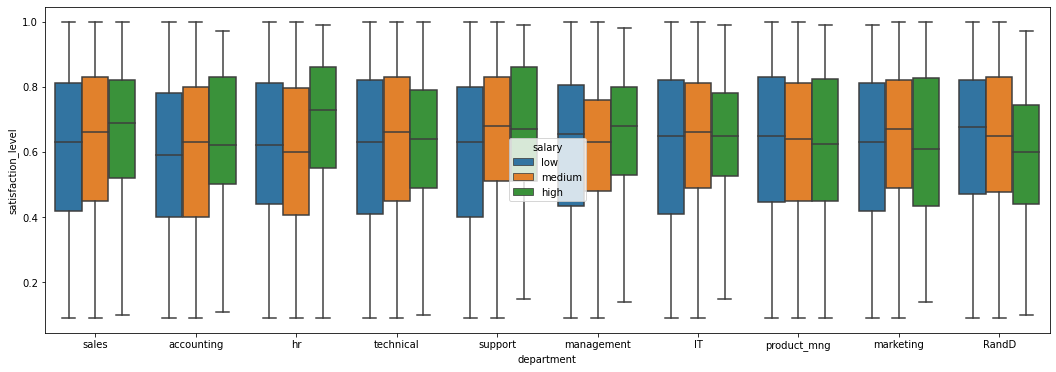

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.boxplot(data=ret_df, x='department', y='satisfaction_level', hue='salary', ax=ax)

In [27]:
ret_df_pre1 = (ret_df
.assign(Work_accident=lambda df: df['Work_accident'].replace(dict(enumerate(['No', 'Yes']))))
.assign(promotion_last_5years=lambda df: df['promotion_last_5years'].replace(dict(enumerate(['No', 'Yes']))))
)
ret_df_pre1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,No,1,No,sales,low
1,0.80,0.86,5,262,6,No,1,No,sales,medium
2,0.11,0.88,7,272,4,No,1,No,sales,medium
3,0.72,0.87,5,223,5,No,1,No,sales,low
4,0.37,0.52,2,159,3,No,1,No,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,No,1,No,support,low
14995,0.37,0.48,2,160,3,No,1,No,support,low
14996,0.37,0.53,2,143,3,No,1,No,support,low
14997,0.11,0.96,6,280,4,No,1,No,support,low


In [29]:
ret_df_encode = pd.get_dummies(ret_df_pre1)
ret_df_encode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_No,Work_accident_Yes,promotion_last_5years_No,promotion_last_5years_Yes,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [33]:
X_sat = ret_df_encode.loc[:, ['last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company',
       'Work_accident_No', 'Work_accident_Yes', 'promotion_last_5years_No',
       'promotion_last_5years_Yes', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']].values
X_ret = ret_df_encode.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company',
       'Work_accident_No', 'Work_accident_Yes', 'promotion_last_5years_No',
       'promotion_last_5years_Yes', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']].values
y_sat = ret_df_encode.loc[:, 'satisfaction_level'].values
y_ret = ret_df_encode.loc[:, 'left'].values

In [34]:
X_sat_train, X_sat_test, y_sat_train, y_sat_test = train_test_split(X_sat, y_sat, random_state=0)

In [41]:
pipe = make_pipeline(SVR())
param_grid = {'svr__C':[0.001, 0.01, 0.1, 1, 10], 'svr__gamma':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, n_jobs=-1).fit(X_sat_train, y_sat_train)

In [42]:
grid.best_params_, grid.best_score_, grid.score(X_sat_test, y_sat_test)

({'svr__C': 0.1, 'svr__gamma': 0.1}, 0.3901812490748478, 0.38808939581931345)